# Lecture 21: Intro to Neural Networks

Plan:
1. Set up imports
2. Load CIFAR-10 images data using pickle
3. Write a function to view an image
4. Train/test split
5. Model fitting
6. Accuracy Evaluation
7. Look at loss curve 
8. Investigate how hidden layer architecture affects loss curve
7. Activity: investigate how the maximum iterations affects loss curve

In [2]:
# set up imports
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

In [3]:
# load the CIFAR-10 data
with open('cifar_data', 'rb') as file:
    cifar_data = pickle.load(file, encoding='latin1')

type(cifar_data)

dict

In [4]:
# get image data and label data
image_data = cifar_data['data']
label_data = cifar_data['labels']

len(label_data)

10000

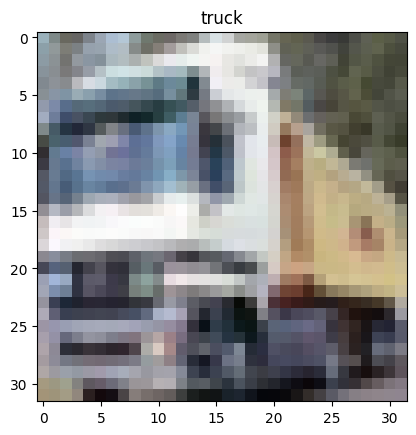

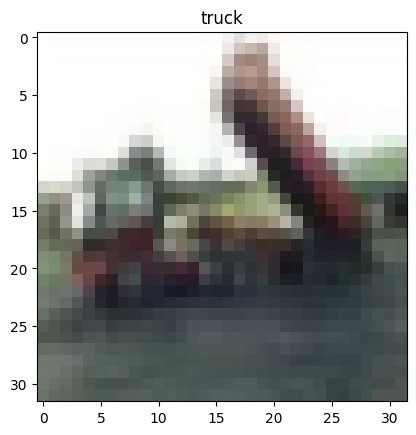

In [5]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def show_image(image, label):
    # reshape the image data into (3 x 32 x 32)
    img = image.reshape(3, 32, 32)

    # reorder the dimensions for matplotlib
    img = img.transpose(1, 2, 0)

    # show image
    plt.imshow(img)
    plt.title(label_names[label])
    plt.show()

# test the function
show_image(image_data[1], label_data[1])
show_image(image_data[2], label_data[2])

In [6]:
# do train/test split
X_train, X_test, y_train, y_test = train_test_split(image_data, label_data, random_state=42)

X_train.shape

(7500, 3072)

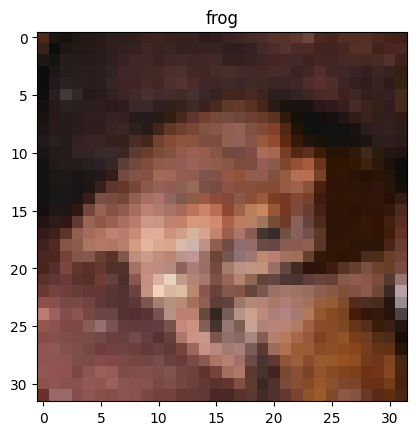

In [7]:
show_image(X_test[0], y_test[0])

In [10]:
# define our model
clf = MLPClassifier(hidden_layer_sizes=(100, 100), random_state=42)

# train the model
clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100), random_state=42)

In [11]:
# make predictions
y_pred = clf.predict(X_test)

# determine the accuracy
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.3308

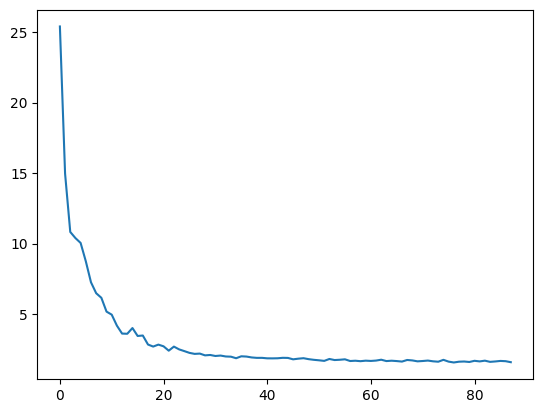

In [14]:
# get the loss curve data
loss_data = clf.loss_curve_

# plot the loss data
plt.plot(loss_data)

In [26]:
# investigate how hidden layer shape affects accuracy
hidden_layer_sizes = [
    (50,),
    (100,),
    (100, 100),
    (100, 100, 100),
]

loss_data_list = []

# loop over hidden layer shapes, train model, and save the loss curve data
for hidden_layer_size in hidden_layer_sizes:
    print(hidden_layer_size)

    # define the model
    clf = MLPClassifier(
        hidden_layer_sizes=hidden_layer_size, 
        batch_size=500,
        learning_rate_init=0.0001, 
        learning_rate='adaptive',
        random_state=42
    )

    # train the model
    clf.fit(X_train, y_train)

    # make predictions
    y_pred = clf.predict(X_test)

    # add the loss curve to our list
    loss_data_list.append(clf.loss_curve_)

loss_data_list

(50,)
(100,)
(100, 100)


/home/codespace/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(100, 100, 100)


/home/codespace/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[[np.float64(30.459524180062957),
  np.float64(27.765284020457642),
  np.float64(26.159763170505),
  np.float64(25.251305901547592),
  np.float64(24.354801984125995),
  np.float64(23.194142712697108),
  np.float64(21.760394255958044),
  np.float64(18.301075841600007),
  np.float64(5.655431610001284),
  np.float64(2.81513177461488),
  np.float64(2.6077583252699665),
  np.float64(2.5251954326144292),
  np.float64(2.478606787665338),
  np.float64(2.4520842478658817),
  np.float64(2.433222460949671),
  np.float64(2.4183659527392636),
  np.float64(2.405384919334938),
  np.float64(2.3947125335750004),
  np.float64(2.384918866900958),
  np.float64(2.3780101353834198),
  np.float64(2.3708532845194803),
  np.float64(2.3647806133734415),
  np.float64(2.3587292263606066),
  np.float64(2.353925113805089),
  np.float64(2.3486949709066702),
  np.float64(2.344739810676087),
  np.float64(2.3412876390323203),
  np.float64(2.3373737008041253),
  np.float64(2.3345267761487305),
  np.float64(2.33087397017

In [27]:
# check the accuracy of the (100, 100, 100) model with slow learning
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

accuracy

0.3412

In [28]:
# convert the loss data to a dataframe
loss_df = pd.DataFrame(loss_data_list)

# transpose the dataframe
loss_df = loss_df.T

# label the columns better
labels = [str(shape) for shape in hidden_layer_sizes]
loss_df.columns = labels

loss_df

,"(50,)","(100,)","(100, 100)","(100, 100, 100)"
0,30.459524,29.544069,27.644258,22.807821
1,27.765284,26.854235,22.584548,14.721280
2,26.159763,24.829553,19.227139,11.819943
3,25.251306,23.626409,16.815751,10.088426
4,24.354802,22.622174,14.874477,8.794993
...,...,...,...,...
195,NaN,NaN,1.315444,1.061349
196,NaN,NaN,1.257821,1.072951
197,NaN,NaN,1.239444,1.071947
198,NaN,NaN,1.272627,1.042010


<Axes: >

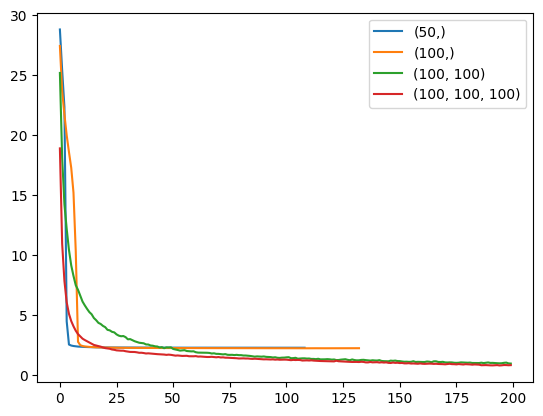

In [23]:
loss_df.plot()

Text(0.5, 1.0, 'Effect of Hidden Layer Shape on NN Accuracy')

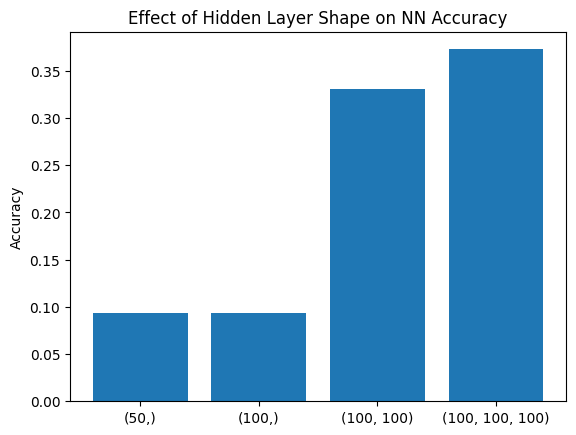

In [19]:
# make a bar graph
labels = [str(shape) for shape in hidden_layer_sizes]

plt.bar(labels, accuracy_score_list)
plt.ylabel('Accuracy')
plt.title('Effect of Hidden Layer Shape on NN Accuracy')

In [ ]:
activation_functions = ['identity', 'logistic', 'tanh', 'relu']

# make a blank list to store accuracy scores

# loop over the activation functions

# define, train, and evaluate model with give activation function

# store accuracy in the list

# generate a bar graph of accuracy